In [1]:
## Loading data

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

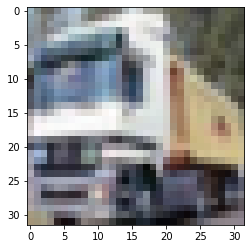

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1])

In [6]:
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [7]:
y_test[0]

array([3], dtype=uint8)

In [8]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


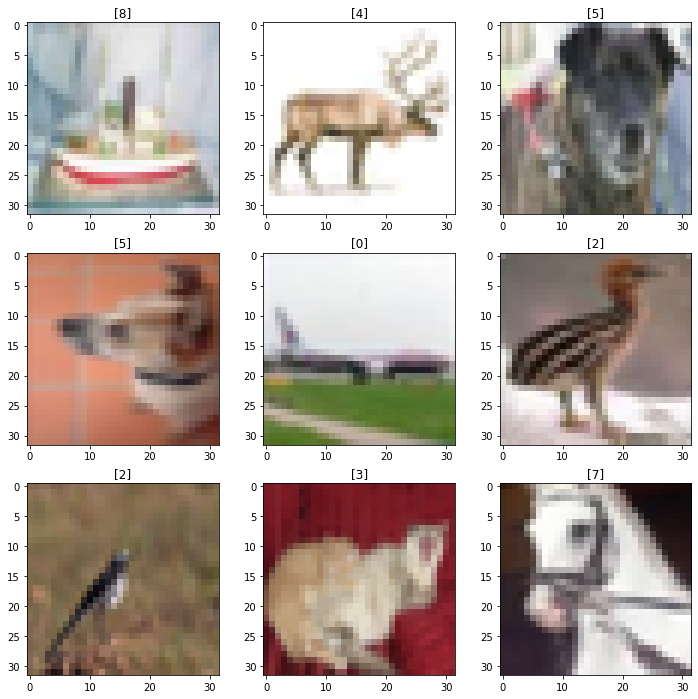

In [9]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(x_train[idx[i]], (32,32,3))
    plt.imshow(grid_data, cmap='gray')

In [10]:
### data preprocessing

In [11]:
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


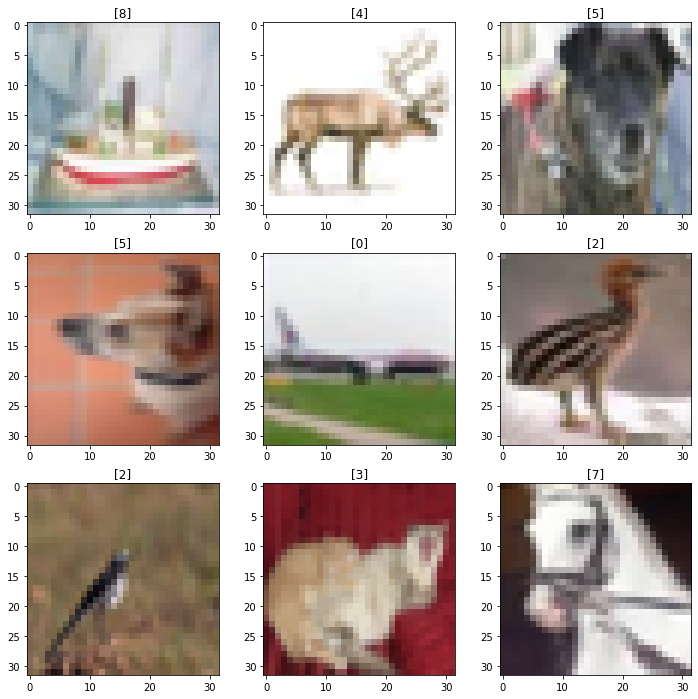

In [13]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(x_train[idx[i]], (32,32,3))
    plt.imshow(grid_data, cmap='gray')

In [14]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [15]:
num_classes = y_train.max()+1 #10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [16]:
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [17]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [18]:
# reshape for model  # flatterning
x_train  = x_train.reshape(x_train.shape[0],-1)
x_test  = x_test.reshape(x_test.shape[0],-1)

In [19]:
x_train.shape,x_test.shape

((50000, 3072), (10000, 3072))

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras import optimizers

In [21]:
model = Sequential()
model.add(Dense(50,input_shape=(3072,),activation='sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [22]:
(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                153650    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0

In [23]:
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(x_train,y_train,batch_size=256,epochs=100,verbose=1)

Epoch 1/100
196/196 [==============================] - 3s 3ms/step - loss: 2.3499 - accuracy: 0.1006
Epoch 2/100
196/196 [==============================] - 1s 3ms/step - loss: 2.3024 - accuracy: 0.1028
Epoch 3/100
196/196 [==============================] - 1s 3ms/step - loss: 2.3017 - accuracy: 0.1068
Epoch 4/100
196/196 [==============================] - 1s 3ms/step - loss: 2.3014 - accuracy: 0.1173
Epoch 5/100
196/196 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1216
Epoch 6/100
196/196 [==============================] - 1s 3ms/step - loss: 2.3006 - accuracy: 0.1401
Epoch 7/100
196/196 [==============================] - 1s 3ms/step - loss: 2.3002 - accuracy: 0.1329
Epoch 8/100
196/196 [==============================] - 1s 3ms/step - loss: 2.2998 - accuracy: 0.1416
Epoch 9/100
196/196 [==============================] - 1s 3ms/step - loss: 2.2994 - accuracy: 0.1284
Epoch 10/100
196/196 [==============================] - 1s 3ms/step - loss: 2.2990 - accura

In [25]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9569 - accuracy: 0.2716


## optimiser ADAM

In [26]:
adam = optimizers.Adam(lr=0.01)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(x_train,y_train,batch_size=256,epochs=100,verbose=0)

In [28]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9440 - accuracy: 0.2941


In [29]:
results

[1.944037914276123, 0.29409998655319214]

In [30]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
y_pred

array([6, 9, 8, ..., 4, 6, 4])

## changing the learning rates

In [32]:
 # for adam optimiser
 l_rate = [0.001,0.01,0.1,1,10]
 for lr in range(len(l_rate)):
   adam = optimizers.Adam(lr=l_rate[lr])
   model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
   model.fit(x_train,y_train,batch_size=256,epochs=100,verbose=0)
   results = model.evaluate(x_test,y_test)
   print(f"with learning rate {l_rate[lr]} \nloss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 1.8425 - accuracy: 0.3409
with learning rate 0.001 
loss : 1.8424699306488037
Accuracy : 0.3409000039100647
313/313 [==============================] - 1s 2ms/step - loss: 1.8327 - accuracy: 0.3412
with learning rate 0.01 
loss : 1.8327171802520752
Accuracy : 0.34119999408721924
313/313 [==============================] - 1s 2ms/step - loss: 2.3076 - accuracy: 0.1000
with learning rate 0.1 
loss : 2.307638168334961
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 2ms/step - loss: 2.3257 - accuracy: 0.1000
with learning rate 1 
loss : 2.3257484436035156
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 2ms/step - loss: 2.4777 - accuracy: 0.1000
with learning rate 10 
loss : 2.4776692390441895
Accuracy : 0.10000000149011612


In [33]:
 # for SGD optimiser
 l_rate = [0.001,0.01,0.1,1,10]
 for lr in range(len(l_rate)):
   sgd = optimizers.SGD(lr=l_rate[lr])
   model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
   model.fit(x_train,y_train,batch_size=256,epochs=100,verbose=0)
   results = model.evaluate(x_test,y_test)
   print(f"with learning rate {l_rate[lr]}\nloss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 2.3067 - accuracy: 0.1000
with learning rate 0.001
loss : 2.306697368621826
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000
with learning rate 0.01
loss : 2.3025851249694824
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000
with learning rate 0.1
loss : 2.3026280403137207
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 2ms/step - loss: 2.3035 - accuracy: 0.1000
with learning rate 1
loss : 2.303457498550415
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 2ms/step - loss: 2.3606 - accuracy: 0.1000
with learning rate 10
loss : 2.360628128051758
Accuracy : 0.10000000149011612


## Build a simple network with 2 dense layers

In [34]:
model = None
model =  Sequential()
model.add(Dense(2,activation='relu',input_shape=(3072,)))
model.add(Dense(10,activation='softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6146      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                30        
Total params: 6,176
Trainable params: 6,176
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.0976
Epoch 2/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.0979
Epoch 3/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0990
Epoch 4/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0972
Epoch 5/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.0973
Epoch 6/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1004
Epoch 7/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1003
Epoch 8/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.0993
Epoch 9/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.0990
Epoch 10/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0975

In [38]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000


In [39]:
print(f"loss : {results[0]}\nAccuracy : {results[1]}")

loss : 2.3025944232940674
Accuracy : 0.10000000149011612


###  Increase the dense layer by 2 with changing activations functions (‘selu’, ’softplus’, ’elu’, ’relu’)


In [40]:
model = None
model = Sequential()
model.add(Dense(2,input_shape=(3072,),activation='selu'))
model.add(Dense(4,activation='softplus'))
model.add(Dense(6,activation='elu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6146      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                90        
Total params: 6,334
Trainable params: 6,334
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [43]:
model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=0)

In [44]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9038 - accuracy: 0.2732


In [45]:
print(f"loss : {results[0]}\nAccuracy : {results[1]}")

loss : 1.9038370847702026
Accuracy : 0.27320000529289246


### Stochastic Gradient Descent

In [46]:
#1
sgd = optimizers.SGD()

In [47]:
model = None
model = Sequential()
model.add(Dense(2,input_shape=(3072,),activation='selu'))
model.add(Dense(4,activation='softplus'))
model.add(Dense(6,activation='elu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 6146      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_15 (Dense)             (None, 10)                90        
Total params: 6,334
Trainable params: 6,334
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1)

Epoch 1/10
391/391 [==============================] - 1s 3ms/step - loss: 2.2984 - accuracy: 0.1082
Epoch 2/10
391/391 [==============================] - 1s 3ms/step - loss: 2.2598 - accuracy: 0.1516
Epoch 3/10
391/391 [==============================] - 1s 3ms/step - loss: 2.2238 - accuracy: 0.1649
Epoch 4/10
391/391 [==============================] - 1s 3ms/step - loss: 2.1854 - accuracy: 0.1725
Epoch 5/10
391/391 [==============================] - 1s 3ms/step - loss: 2.1529 - accuracy: 0.1756
Epoch 6/10
391/391 [==============================] - 1s 3ms/step - loss: 2.1276 - accuracy: 0.1804
Epoch 7/10
391/391 [==============================] - 1s 3ms/step - loss: 2.1073 - accuracy: 0.1857
Epoch 8/10
391/391 [==============================] - 1s 3ms/step - loss: 2.0996 - accuracy: 0.1876
Epoch 9/10
391/391 [==============================] - 1s 3ms/step - loss: 2.0850 - accuracy: 0.1904
Epoch 10/10
391/391 [==============================] - 1s 3ms/step - loss: 2.0745 - accuracy: 0.1922

In [51]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.0651 - accuracy: 0.1942


In [52]:
print(f"loss : {results[0]}\nAccuracy : {results[1]}")

loss : 2.0651087760925293
Accuracy : 0.19419999420642853


In [53]:
#2 Nesterov Accelerated Gradient
model = None
model = Sequential()
model.add(Dense(2,input_shape=(3072,),activation='selu'))
model.add(Dense(4,activation='softplus'))
model.add(Dense(6,activation='elu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2)                 6146      
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_20 (Dense)             (None, 10)                90        
Total params: 6,334
Trainable params: 6,334
Non-trainable params: 0
_________________________________________________________________


In [55]:
nadam = optimizers.Nadam()

In [56]:
model.compile(optimizer=nadam,loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(x_train,y_train,epochs=10,verbose=0,batch_size=128)

In [58]:
results = model.evaluate(x_test,y_test,)

313/313 [==============================] - 1s 2ms/step - loss: 1.9091 - accuracy: 0.2678


In [59]:
print(f"loss : {results[0]}\nAccuracy : {results[1]}")

loss : 1.9091240167617798
Accuracy : 0.2678000032901764


In [60]:
#3 Adam
model = None
model = Sequential()
model.add(Dense(128,input_shape=(3072,),activation='selu'))
model.add(Dense(64,activation='softplus'))
model.add(Dense(32,activation='elu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                170       
Total params: 404,378
Trainable params: 404,378
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy')

In [63]:
model.fit(x_train,y_train,batch_size=128,epochs=20)

Epoch 1/20
391/391 [==============================] - 2s 3ms/step - loss: 2.3211 - accuracy: 0.1130
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 2.3028 - accuracy: 0.0959
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1010
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1007
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1016
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0966
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0991
Epoch 8/20
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.0973
Epoch 9/20
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.0976
Epoch 10/20
391/391 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0977

In [64]:
results = model.evaluate(x_test,y_test)
print(f"loss : {results[0]}\naccuracy : {results[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000
loss : 2.302597761154175
accuracy : 0.10000000149011612


In [65]:
#4 RMSprop

model = None
model = Sequential()
model.add(Dense(128,input_shape=(3072,),activation='selu'))
model.add(Dense(64,activation='softplus'))
model.add(Dense(32,activation='elu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [66]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                170       
Total params: 404,378
Trainable params: 404,378
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(loss='categorical_crossentropy',metrics="accuracy")

In [68]:
model.fit(x_train,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 5s 4ms/step - loss: 2.1871 - accuracy: 0.1975 - val_loss: 2.0553 - val_accuracy: 0.2488
Epoch 2/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.8443 - accuracy: 0.3283 - val_loss: 1.7650 - val_accuracy: 0.3665
Epoch 3/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.7518 - accuracy: 0.3655 - val_loss: 1.7547 - val_accuracy: 0.3671
Epoch 4/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.7002 - accuracy: 0.3878 - val_loss: 1.6642 - val_accuracy: 0.4003
Epoch 5/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.6317 - accuracy: 0.4169 - val_loss: 1.6484 - val_accuracy: 0.4129
Epoch 6/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.5899 - accuracy: 0.4294 - val_loss: 1.7211 - val_accuracy: 0.3947
Epoch 7/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.5612 - accuracy: 0.4398 - val_loss: 1.5826 - val_accuracy:

In [69]:
results = model.evaluate(x_test,y_test)
print(f"loss : {results[0]}\naccuracy : {results[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 1.5914 - accuracy: 0.4428
loss : 1.5913771390914917
accuracy : 0.44279998540878296


In [70]:
#5 Adagrad

model = None
model = Sequential()
model.add(Dense(128,input_shape=(3072,),activation='selu'))
model.add(Dense(64,activation='softplus'))
model.add(Dense(32,activation='elu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [71]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                170       
Total params: 404,378
Trainable params: 404,378
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer="Adagrad",loss="categorical_crossentropy",metrics="accuracy")

In [73]:
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.2179 - accuracy: 0.1628 - val_loss: 2.0611 - val_accuracy: 0.2435
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 2.0370 - accuracy: 0.2487 - val_loss: 1.9873 - val_accuracy: 0.2652
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.9569 - accuracy: 0.2893 - val_loss: 1.9290 - val_accuracy: 0.3122
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.9059 - accuracy: 0.3204 - val_loss: 1.8885 - val_accuracy: 0.3305
Epoch 5/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8716 - accuracy: 0.3390 - val_loss: 1.8609 - val_accuracy: 0.3449
Epoch 6/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8373 - accuracy: 0.3488 - val_loss: 1.8411 - val_accuracy: 0.3523
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8235 - accuracy: 0.3581 - val_loss: 1.8236 - val_accuracy:

In [74]:
result = model.evaluate(x_test,y_test)
print(f"Loss : {result[0]}\nAccuracy : {result[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 1.7785 - accuracy: 0.3731
Loss : 1.7784708738327026
Accuracy : 0.37310001254081726


In [75]:
#6 Gradient Descent

model = Sequential()
model.add(Dense(128,activation='sigmoid',input_shape=(3072,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [76]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_40 (Dense)             (None, 10)                170       
Total params: 404,378
Trainable params: 404,378
Non-trainable params: 0
_________________________________________________________________


In [77]:
gd = optimizers.SGD(momentum=0.1)

In [78]:
model.compile(optimizer=gd,loss='categorical_crossentropy',metrics='accuracy')

In [79]:
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.2315 - accuracy: 0.1624 - val_loss: 1.9886 - val_accuracy: 0.2791
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.9492 - accuracy: 0.2975 - val_loss: 1.9033 - val_accuracy: 0.3172
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.8702 - accuracy: 0.3268 - val_loss: 1.8522 - val_accuracy: 0.3414
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.8239 - accuracy: 0.3504 - val_loss: 1.8093 - val_accuracy: 0.3479
Epoch 5/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7731 - accuracy: 0.3632 - val_loss: 1.7433 - val_accuracy: 0.3783
Epoch 6/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7286 - accuracy: 0.3819 - val_loss: 1.7169 - val_accuracy: 0.3889
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6972 - accuracy: 0.3938 - val_loss: 1.7043 - val_accuracy:

In [80]:
result = model.evaluate(x_test,y_test)
print(f"Loss : {result[0]}\nAccuracy : {result[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 1.6171 - accuracy: 0.4238
Loss : 1.6170861721038818
Accuracy : 0.423799991607666


In [81]:
#7 Nesterov Accelerated Gradient

model = Sequential()
model.add(Dense(128,activation='sigmoid',input_shape=(3072,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [82]:
nag = optimizers.SGD(nesterov=True,name='nesterov')

In [83]:
model.compile(optimizer=nag,loss='categorical_crossentropy',metrics="accuracy")

In [84]:
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.2562 - accuracy: 0.1537 - val_loss: 2.0232 - val_accuracy: 0.2587
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.9971 - accuracy: 0.2675 - val_loss: 1.9347 - val_accuracy: 0.2884
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.9112 - accuracy: 0.3014 - val_loss: 1.8845 - val_accuracy: 0.3097
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8528 - accuracy: 0.3235 - val_loss: 1.8221 - val_accuracy: 0.3401
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7971 - accuracy: 0.3499 - val_loss: 1.7903 - val_accuracy: 0.3592
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7653 - accuracy: 0.3628 - val_loss: 1.7846 - val_accuracy: 0.3598
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7328 - accuracy: 0.3775 - val_loss: 1.7301 - val_accuracy:

In [85]:
result = model.evaluate(x_test,y_test)
print(f"Loss : {result[0]}\nAccuracy : {result[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 1.6694 - accuracy: 0.3973
Loss : 1.6693577766418457
Accuracy : 0.39730000495910645


##  Dropout and Batch Normalisation

In [86]:
from tensorflow.keras.layers import BatchNormalization,Flatten,Dropout

In [87]:
#8 mini batch Gradient Descent

model = None
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(3072,)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [88]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 2s 4ms/step - loss: 2.0102 - accuracy: 0.2788
Epoch 2/10
391/391 [==============================] - 1s 3ms/step - loss: 1.7378 - accuracy: 0.3800
Epoch 3/10
391/391 [==============================] - 1s 3ms/step - loss: 1.6672 - accuracy: 0.4022
Epoch 4/10
391/391 [==============================] - 1s 3ms/step - loss: 1.6407 - accuracy: 0.4150
Epoch 5/10
391/391 [==============================] - 1s 3ms/step - loss: 1.6047 - accuracy: 0.4246
Epoch 6/10
391/391 [==============================] - 1s 3ms/step - loss: 1.5925 - accuracy: 0.4296
Epoch 7/10
391/391 [==============================] - 1s 4ms/step - loss: 1.5846 - accuracy: 0.4327
Epoch 8/10
391/391 [==============================] - 1s 3ms/step - loss: 1.5621 - accuracy: 0.4383
Epoch 9/10
391/391 [==============================] - 1s 4ms/step - loss: 1.5474 - accuracy: 0.4431
Epoch 10/10
391/391 [==============================] - 1s 3ms/step - loss: 1.5285 - accuracy: 0.4551

In [90]:
results = model.evaluate(x_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', results)

Test Loss and Test Accuracy [1.5543501377105713, 0.4431999921798706]


## Hyper parameter tuning

In [91]:
def build_model(hp):
    model = Sequential()
    #model.add(Flatten(input_shape=(32,32,3)))
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [92]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(32,32,3)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [97]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 6.0MB/s 


In [99]:
from kerastuner.tuners import Hyperband,RandomSearch

In [100]:
tuner = Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='cnn_cifar_10')

In [101]:
from tensorflow.keras.callbacks import EarlyStopping

In [102]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [103]:
tuner.search(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 32s]
val_accuracy: 0.10249999910593033

Best val_accuracy So Far: 0.453000009059906
Total elapsed time: 00h 06m 38s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 128 and the optimal learning rate for the optimizer
is 0.0001.



In [104]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0084 - accuracy: 0.2848 - val_loss: 1.8115 - val_accuracy: 0.3645
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7638 - accuracy: 0.3780 - val_loss: 1.7402 - val_accuracy: 0.3957
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6798 - accuracy: 0.4171 - val_loss: 1.6891 - val_accuracy: 0.4155
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6298 - accuracy: 0.4295 - val_loss: 1.6584 - val_accuracy: 0.4266
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5948 - accuracy: 0.4433 - val_loss: 1.6248 - val_accuracy: 0.4377
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5663 - accuracy: 0.4543 - val_loss: 1.6128 - val_accuracy: 0.4395
Epoch 7/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5362 - accuracy: 0.4685 - val_loss: 1.6013 - val_accuracy:

In [105]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0151 - accuracy: 0.2775
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7641 - accuracy: 0.3799
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6927 - accuracy: 0.4132
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6363 - accuracy: 0.4298
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6009 - accuracy: 0.4407
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5673 - accuracy: 0.4529
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5330 - accuracy: 0.4646
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5095 - accuracy: 0.4752
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4862 - accuracy: 0.4820
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.471

In [106]:
eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 1s 2ms/step - loss: 1.5061 - accuracy: 0.4682
[test loss, test accuracy]: [1.50614595413208, 0.4681999981403351]
